In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("C:\\Users\\AL-MASA\\Desktop\\Datasets\\Mall_Customers.csv")

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
data.shape

(200, 5)

In [7]:
print("Number of rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of rows 200
Number of columns 5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Check Null values in the dataset

In [9]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Get Overall Statistics about The dataset

In [10]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Kmeans clustering

In [11]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
x = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [13]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [14]:
from sklearn.cluster import KMeans

In [15]:
k_means = KMeans()
k_means.fit(x)

KMeans()

In [16]:
k_means = KMeans()
k_means.fit_predict(x)

array([4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7,
       4, 7, 4, 7, 4, 1, 4, 7, 4, 7, 4, 7, 4, 7, 4, 1, 4, 1, 3, 7, 3, 1,
       4, 1, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 2, 5, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6,
       0, 6])

### Elbow Method to find Optimal number of clusters

In [17]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(x)
    wcss.append(k_means.inertia_)

In [18]:
wcss

[269981.28,
 181363.59595959596,
 132485.3805668016,
 73679.78903948834,
 67617.67721783047,
 37271.88623658949,
 32245.024035744027,
 30132.68149970185,
 27798.49171089004,
 21627.327668872003]

In [19]:
import matplotlib.pyplot as plt

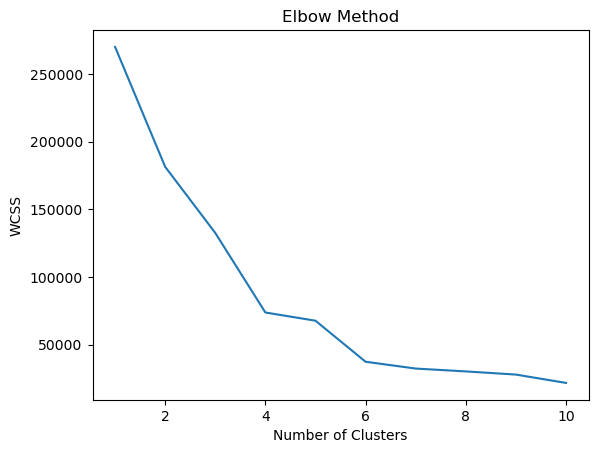

In [20]:
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Model Training

In [21]:
x = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [22]:
k_means = KMeans(n_clusters=5, random_state=42)
y_means = k_means.fit_predict(x)

In [23]:
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

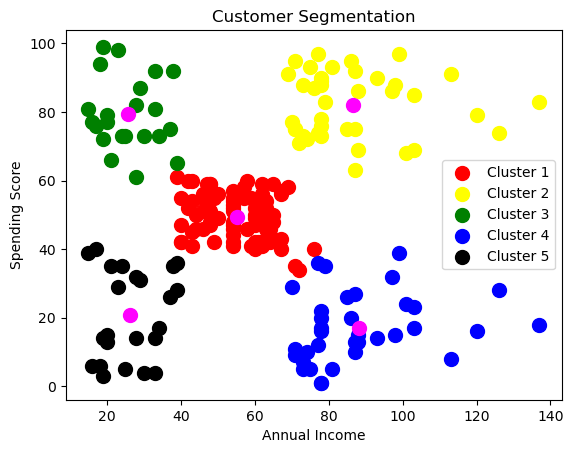

In [24]:
plt.scatter(x.iloc[y_means==0,0], x.iloc[y_means==0,1], s=100,c='red', label="Cluster 1" )
plt.scatter(x.iloc[y_means==1,0], x.iloc[y_means==1,1], s=100,c='yellow', label="Cluster 2" )
plt.scatter(x.iloc[y_means==2,0], x.iloc[y_means==2,1], s=100,c='green', label="Cluster 3" )
plt.scatter(x.iloc[y_means==3,0], x.iloc[y_means==3,1], s=100,c='blue', label="Cluster 4" )
plt.scatter(x.iloc[y_means==4,0], x.iloc[y_means==4,1], s=100,c='black', label="Cluster 5" )
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1], s=100, c="magenta")
plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [25]:
k_means.predict([[15,39]])

array([4])

### Save the model

In [26]:
import joblib

In [27]:
joblib.dump(k_means, "Customer Segmentation")

['Customer Segmentation']

In [28]:
model = joblib.load('Customer Segmentation')

In [29]:
model.predict([[15, 39]])

array([4])

### GUI

In [30]:
from tkinter import *
import joblib

In [31]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    
    model = joblib.load('Customer Segmentation')
    result = model.predict([[p1,p2]])
    Label(master, text="this customer belongs to cluster no: ").grid(row=4, columnspan=2)
    Label(master, text=result[0]).grid(row=4, column=3)
    print("this customer belongs to cluster no: ", result[0])
    
    if result[0]==0:
        Label(master, text="customer with medium annual income and medium spending score")
    elif result[0]==1:
        Label(master, text="customer with high annual income and low spending score").grid(row=6, columnspan=4) 
    elif result[0]==2:
        Label(master, text="customer with low annual income and low spending score").grid(row=6, columnspan=4)    
    elif result[0]==3:
        Label(master, text="customer with low annual income and high spending score").grid(row=6, columnspan=4)    
    elif result[0]==4:
        Label(master, text="customer with high annual income and high spending score").grid(row=6, columnspan=4)    
   



master = Tk()
master.title("Customer segmentation using machine learning")
master.geometry("500x200")

label = Label(master, text="customer segmentation using machine learning",
              bg="black", fg="white").grid(row=0,columnspan=2)


Label(master, text="Annual Income").grid(row=1)
Label(master, text="Spending Score").grid(row=2)

e1 = Entry(master)
e2 = Entry(master) 

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

Button(master, text='predict', command=show_entry_fields).grid(row=3)

master.mainloop()

this customer belongs to cluster no:  2
